<img src= https://www.digitalhouse.com/logo-DH.png>

# Importamos las librerias a usar 

In [1]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

# Primero vamos a importar el archivo a utilizar

In [2]:
df = pd.read_csv('properatti.csv')

# Vamos a inspeccionarlo

In [3]:
df.head()

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
0,0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6618237,-58.5088387",-34.661824,...,40.0,1127.272727,1550.000000,NaN,NaN,NaN,http://www.properati.com.ar/15bo8_venta_ph_mat...,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,https://thumbs4.properati.com/8/BluUYiHJLhgIIK...
1,1,sell,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Argentina,Bs.As. G.B.A. Zona Sur,3432039.0,"-34.9038831,-57.9643295",-34.903883,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15bob_venta_depart...,Venta de departamento en décimo piso al frente...,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...,https://thumbs4.properati.com/7/ikpVBu2ztHA7jv...
2,2,sell,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6522615,-58.5229825",-34.652262,...,55.0,1309.090909,1309.090909,NaN,NaN,NaN,http://www.properati.com.ar/15bod_venta_depart...,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,https://thumbs4.properati.com/5/SXKr34F_IwG3W_...
3,3,sell,PH,Liniers,|Argentina|Capital Federal|Liniers|,Argentina,Capital Federal,3431333.0,"-34.6477969,-58.5164244",-34.647797,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15boh_venta_ph_lin...,PH 3 ambientes con patio. Hay 3 deptos en lote...,PH 3 amb. cfte. reciclado,https://thumbs4.properati.com/3/DgIfX-85Mog5SP...
4,4,sell,apartment,Centro,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Argentina,Buenos Aires Costa Atlántica,3435548.0,"-38.0026256,-57.5494468",-38.002626,...,35.0,1828.571429,1828.571429,NaN,NaN,NaN,http://www.properati.com.ar/15bok_venta_depart...,DEPARTAMENTO CON FANTÁSTICA ILUMINACIÓN NATURA...,DEPTO 2 AMB AL CONTRAFRENTE ZONA CENTRO/PLAZA ...,https://thumbs4.properati.com/5/xrRqlNcSI_vs-f...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121220 entries, 0 to 121219
Data columns (total 26 columns):
Unnamed: 0                    121220 non-null int64
operation                     121220 non-null object
property_type                 121220 non-null object
place_name                    121197 non-null object
place_with_parent_names       121220 non-null object
country_name                  121220 non-null object
state_name                    121220 non-null object
geonames_id                   102503 non-null float64
lat-lon                       69670 non-null object
lat                           69670 non-null float64
lon                           69670 non-null float64
price                         100810 non-null float64
currency                      100809 non-null object
price_aprox_local_currency    100810 non-null float64
price_aprox_usd               100810 non-null float64
surface_total_in_m2           81892 non-null float64
surface_covered_in_m2         101313 no

In [5]:
df.describe()

,Unnamed: 0,geonames_id,lat,lon,price,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses
count,121220.000000,1.025030e+05,69670.000000,69670.000000,1.008100e+05,1.008100e+05,1.008100e+05,81892.000000,101313.000000,68617.000000,8.765800e+04,7899.000000,47390.000000,1.426200e+04
mean,60609.500000,3.574442e+06,-34.626210,-59.266290,4.685259e+05,4.229397e+06,2.397006e+05,233.795328,133.050181,2160.086916,6.912216e+03,17.452336,3.080840,5.009234e+03
std,34993.344153,3.541306e+05,1.980936,2.299922,2.260101e+06,6.904714e+06,3.913239e+05,1782.222147,724.351479,2759.288621,2.837864e+04,120.243621,1.860773,1.204403e+05
min,0.000000,3.427208e+06,-54.823985,-75.678931,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.600000,1.510204e+00,1.000000,1.000000,1.000000e+00
25%,30304.750000,3.430234e+06,-34.669065,-58.727040,1.100000e+05,1.583309e+06,8.973388e+04,50.000000,45.000000,1218.181818,1.550000e+03,1.000000,2.000000,1.000000e+03
50%,60609.500000,3.433910e+06,-34.597985,-58.480128,1.850000e+05,2.558452e+06,1.450000e+05,84.000000,75.000000,1800.000000,2.213115e+03,3.000000,3.000000,2.000000e+03
75%,90914.250000,3.836668e+06,-34.441299,-58.395908,4.200000e+05,4.675792e+06,2.650000e+05,200.000000,150.000000,2486.411765,3.355549e+03,6.000000,4.000000,4.000000e+03
max,121219.000000,6.948895e+06,4.545843,-53.733330,6.500000e+08,8.212711e+08,4.654544e+07,200000.000000,187000.000000,206333.333333,4.000000e+06,3150.000000,32.000000,1.000150e+07


In [6]:
df.shape

(121220, 26)

# Vamos a proceder a renombrar las columnas para evitar confusiones cuando trabajemos con los datos

In [7]:
new_names = {'property_type':'tipo_propiedad', 'Barrio':'barrio', 'place_name': 'Barrio',
             'state_name': 'Localidad',   'lat': 'Latitud',       'lon': 'Longitud',
             'currency': 'Moneda',  'expenses': 'Expensas',  'place_with_parent_names':'lugar_con_padres', 'País':'pais', 'Localidad':'localidad', 
                   'Latitud':'latitud', 'Longitud':'longitud', 'price':'precio', 'Moneda':'moneda', 
                  'price_aprox_local_currency':'precio_ARS', 
                  'price_aprox_usd':'precio_USD', 'surface_total_in_m2':'superficie_total_m2', 
                  'surface_covered_in_m2':'sup_cubierta_m2' , 'price_usd_per_m2':'precio_USD_por_m2_total', 
                  'price_per_m2':'precio_por_m2_cubierto', 'floor':'piso', 'rooms':'ambientes', 'Expensas':'expensas'}

In [8]:
new_names

{'property_type': 'tipo_propiedad',
 'Barrio': 'barrio',
 'place_name': 'Barrio',
 'state_name': 'Localidad',
 'lat': 'Latitud',
 'lon': 'Longitud',
 'currency': 'Moneda',
 'expenses': 'Expensas',
 'place_with_parent_names': 'lugar_con_padres',
 'País': 'pais',
 'Localidad': 'localidad',
 'Latitud': 'latitud',
 'Longitud': 'longitud',
 'price': 'precio',
 'Moneda': 'moneda',
 'price_aprox_local_currency': 'precio_ARS',
 'price_aprox_usd': 'precio_USD',
 'surface_total_in_m2': 'superficie_total_m2',
 'surface_covered_in_m2': 'sup_cubierta_m2',
 'price_usd_per_m2': 'precio_USD_por_m2_total',
 'price_per_m2': 'precio_por_m2_cubierto',
 'floor': 'piso',
 'rooms': 'ambientes',
 'Expensas': 'expensas'}

# Ahora llamamos a la funcion rename y a nuestro diccionario

In [9]:
df.rename(columns=new_names,inplace=True)

In [10]:
df.columns

Index(['Unnamed: 0', 'operation', 'tipo_propiedad', 'Barrio',
       'lugar_con_padres', 'country_name', 'Localidad', 'geonames_id',
       'lat-lon', 'Latitud', 'Longitud', 'precio', 'Moneda', 'precio_ARS',
       'precio_USD', 'superficie_total_m2', 'sup_cubierta_m2',
       'precio_USD_por_m2_total', 'precio_por_m2_cubierto', 'piso',
       'ambientes', 'Expensas', 'properati_url', 'description', 'title',
       'image_thumbnail'],
      dtype='object')

# Vamos a eliminar columnas en donde gran parte de sus valores son nulos identificando cuales son esos campos antes de proceder a eliminar los registros duplicados

df.isnull().sum()/121220*100

In [11]:
df.drop(["Unnamed: 0", "operation","properati_url","image_thumbnail","Expensas","piso"],axis=1,inplace=True)

In [12]:
df.shape

(121220, 20)

# Contamos la cantidad de duplicados luego de eliminar la columnas redundandtes

In [13]:
duplicateRowsDF = df[df.duplicated()]

In [14]:
duplicateRowsDF

,tipo_propiedad,Barrio,lugar_con_padres,country_name,Localidad,geonames_id,lat-lon,Latitud,Longitud,precio,Moneda,precio_ARS,precio_USD,superficie_total_m2,sup_cubierta_m2,precio_USD_por_m2_total,precio_por_m2_cubierto,ambientes,description,title
221,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.5652650561,-58.438232802",-34.565265,-58.438233,237895.0,USD,4197538.32,237895.00,69.0,53.0,3447.753623,4488.584906,2.0,El edificio está situado en el barrio de las ...,Ultimas Unidades
245,apartment,Rosario,|Argentina|Santa Fe|Rosario|,Argentina,Santa Fe,3838574.0,"-32.9495571,-60.6582837",-32.949557,-60.658284,NaN,NaN,NaN,NaN,35.0,35.0,NaN,NaN,1.0,Departamento de un ambiente al contrafrente co...,"Departamentos monoambiente, zona parque Indepe..."
247,apartment,Rosario,|Argentina|Santa Fe|Rosario|,Argentina,Santa Fe,3838574.0,"-32.9495571,-60.6582837",-32.949557,-60.658284,NaN,NaN,NaN,NaN,35.0,35.0,NaN,NaN,1.0,Departamento de un ambiente al contrafrente co...,"Departamentos monoambiente, zona parque Indepe..."
248,apartment,Rosario,|Argentina|Santa Fe|Rosario|,Argentina,Santa Fe,3838574.0,"-32.9495571,-60.6582837",-32.949557,-60.658284,NaN,NaN,NaN,NaN,35.0,35.0,NaN,NaN,1.0,Departamento de un ambiente al contrafrente co...,"Departamentos monoambiente, zona parque Indepe..."
249,apartment,Rosario,|Argentina|Santa Fe|Rosario|,Argentina,Santa Fe,3838574.0,"-32.9495571,-60.6582837",-32.949557,-60.658284,NaN,NaN,NaN,NaN,35.0,35.0,NaN,NaN,1.0,Departamento de un ambiente al contrafrente co...,"Departamentos monoambiente, zona parque Indepe..."
250,apartment,Rosario,|Argentina|Santa Fe|Rosario|,Argentina,Santa Fe,3838574.0,"-32.9495571,-60.6582837",-32.949557,-60.658284,NaN,NaN,NaN,NaN,35.0,35.0,NaN,NaN,1.0,Departamento de un ambiente al contrafrente co...,"Departamentos monoambiente, zona parque Indepe..."
317,house,Capital Federal,|Argentina|Capital Federal|,Argentina,Capital Federal,3433955.0,NaN,NaN,NaN,430000.0,USD,7587135.00,430000.00,125.0,156.0,3440.000000,2756.410256,NaN,Buena ubicaciÃ³n. Muy buen acceso. Lezica esq....,"Casa 125m² con 3 Plantas en Lezica, Martín 300..."
400,apartment,Puerto Madero,|Argentina|Capital Federal|Puerto Madero|,Argentina,Capital Federal,3429760.0,"-34.6179151,-58.3617661",-34.617915,-58.361766,350000.0,USD,6175575.00,350000.00,54.0,50.0,6481.481481,7000.000000,2.0,"En su dique 1, y delimitado por el Boulevard J...",ZenCity 2 Amb piso ALTO! Vista RIO
503,house,Capital Federal,|Argentina|Capital Federal|,Argentina,Capital Federal,3433955.0,NaN,NaN,NaN,245000.0,USD,4322902.50,245000.00,160.0,135.0,1531.250000,1814.814815,NaN,Duplex de buenisimas medidas ( 5X33) Hall de a...,"Casa 160m² con 3 Plantas en Marconi, Ing. 2400..."
705,apartment,Santa Fe,|Argentina|Santa Fe|Santa Fe|,Argentina,Santa Fe,3836277.0,"-31.639488,-60.6853763",-31.639488,-60.685376,NaN,NaN,NaN,NaN,45.0,37.0,NaN,NaN,2.0,Venta de Departamento 1 DORMITORIO en COSTANER...,DEPARTAMENTO EN VENTA


# Elimiamos registros duplicados a partir del nuevo dataframe

In [15]:
df.drop_duplicates(inplace=True)

In [16]:
df.shape

(115969, 20)

# Evaluacion de las columnas por separado

In [17]:
df.groupby('tipo_propiedad').count()

,Barrio,lugar_con_padres,country_name,Localidad,geonames_id,lat-lon,Latitud,Longitud,precio,Moneda,precio_ARS,precio_USD,superficie_total_m2,sup_cubierta_m2,precio_USD_por_m2_total,precio_por_m2_cubierto,ambientes,description,title
tipo_propiedad,,,,,,,,,,,,,,,,,,,
PH,5618,5618,5618,5618,4889,3809,3809,3809,5165,5165,5165,5165,3474,4780,3205,4497,3125,5618,5618
apartment,66518,66519,66519,66519,58248,40150,40150,40150,57675,57675,57675,57675,47290,56241,41339,50512,30357,66517,66519
house,39739,39761,39761,39761,31119,21588,21588,21588,32476,32475,32476,32476,24182,33042,20174,28126,12485,39761,39761
store,4071,4071,4071,4071,3540,2208,2208,2208,3218,3218,3218,3218,2648,3105,2084,2520,103,4071,4071


# Vamos a descomponer el campo "lugar_con_padres" para obtener mas datos relacionados a zona geografica

In [18]:
lugar=pd.DataFrame(df['lugar_con_padres'].str.split("|",n=6,expand = True))

In [19]:
lugar

,0,1,2,3,4,5,6
0,,Argentina,Capital Federal,Mataderos,,None,None
1,,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,,None,None
2,,Argentina,Capital Federal,Mataderos,,None,None
3,,Argentina,Capital Federal,Liniers,,None,None
4,,Argentina,Buenos Aires Costa Atlántica,Mar del Plata,Centro,,None
5,,Argentina,Entre Ríos,Gualeguaychú,,None,None
6,,Argentina,Bs.As. G.B.A. Zona Norte,Vicente López,Munro,,None
7,,Argentina,Capital Federal,Belgrano,,None,None
8,,Argentina,Capital Federal,Belgrano,,None,None
9,,Argentina,Santa Fe,Rosario,,None,None


In [20]:
new_names =  {1: 'Pais',
              2: 'Provincia',
              3: 'LocalBarrio',
              4: 'Barrio2',
              5: 'Barrio3',
              6: 'Barrio4',
             }

In [21]:
lugar.rename(columns=new_names,inplace = True)

# Completamos los barrios en donde estaba vacio

In [22]:
df['Barrio']=df['Barrio'].fillna(value=lugar.LocalBarrio)

In [23]:
#df.loc(Barrio)=='Tigre' # controlamos que el barrio esta completo en todos los casos
df.loc[df['Barrio']=='Tigre']

,tipo_propiedad,Barrio,lugar_con_padres,country_name,Localidad,geonames_id,lat-lon,Latitud,Longitud,precio,Moneda,precio_ARS,precio_USD,superficie_total_m2,sup_cubierta_m2,precio_USD_por_m2_total,precio_por_m2_cubierto,ambientes,description,title
18,house,Tigre,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre|,Argentina,Bs.As. G.B.A. Zona Norte,3427753.0,"-34.425087,-58.5796585",-34.425087,-58.579659,570000.0,USD,10057365.00,570000.00,270.0,270.0,2111.111111,2111.111111,NaN,Casa sobre lote al golf en barrio San Isidro L...,"Casa en venta en barrio San Isidro Labrador, T..."
237,house,Tigre,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre|,Argentina,Bs.As. G.B.A. Zona Norte,3427753.0,"-34.3797634778,-58.6778488076",-34.379763,-58.677849,420000.0,USD,7410690.00,420000.00,300.0,300.0,1400.000000,1400.000000,NaN,CASA EN VENTA EN SAN ISIDRO LABRADOR. LOTE INT...,CASA EN VENTA EN SAN ISIDRO LABRADOR
239,house,Tigre,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre|,Argentina,Bs.As. G.B.A. Zona Norte,3427753.0,"-34.3806135197,-58.6860885537",-34.380614,-58.686089,420000.0,USD,7410690.00,420000.00,300.0,300.0,1400.000000,1400.000000,NaN,CASA EN VENTA EN SAN ISIDRO LABRADOR. LOTE INT...,CASA EN VENTA EN SAN ISIDRO LABRADOR
387,house,Tigre,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre|,Argentina,Bs.As. G.B.A. Zona Norte,3427753.0,"-34.3714273,-58.6793104",-34.371427,-58.679310,390000.0,USD,6881355.00,390000.00,900.0,200.0,433.333333,1950.000000,NaN,Hermosa casa en barrio privado San Isidro Labr...,EXCELENTE CASA CON AMARRA
410,house,Tigre,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre|Tigre|,Argentina,Bs.As. G.B.A. Zona Norte,NaN,"-34.379324,-58.7177185",-34.379324,-58.717718,365000.0,USD,6440242.50,365000.00,900.0,220.0,405.555556,1659.090909,NaN,JPL. Santa Teresa 4 dormitorios. La casa se en...,JPL. Santa Teresa 4 dormitorios.
457,apartment,Tigre,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre|Tigre|,Argentina,Bs.As. G.B.A. Zona Norte,NaN,"-34.414557,-58.703041",-34.414557,-58.703041,160000.0,USD,2823120.00,160000.00,NaN,69.0,NaN,2318.840580,2.0,Corredor Responsable: Mauro Marvisi - CMCPSI 5...,"DEPARTAMENTO 1 DORMITORIO, BAÑO COMPLETO, PARR..."
459,apartment,Tigre,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre|Tigre|,Argentina,Bs.As. G.B.A. Zona Norte,NaN,"-34.414557,-58.703041",-34.414557,-58.703041,160000.0,USD,2823120.00,160000.00,NaN,69.0,NaN,2318.840580,2.0,Corredor Responsable: Mauro Marvisi - CMCPSI 5...,"DEPARTAMENTO 1 DORMITORIO, BAÑO COMPLETO, PARR..."
464,apartment,Tigre,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre|Tigre|,Argentina,Bs.As. G.B.A. Zona Norte,NaN,"-34.408149,-58.591676",-34.408149,-58.591676,410000.0,USD,7234245.00,410000.00,NaN,204.0,NaN,2009.803922,4.0,Corredor Responsable: Matias Castelli - CUCICB...,VENTA DEPARTAMENTO 4 AMBIENTES TIGRE
568,house,Tigre,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre|,Argentina,Bs.As. G.B.A. Zona Norte,3427753.0,"-34.4223435007,-58.5794868386",-34.422344,-58.579487,170000.0,USD,2999565.00,170000.00,100.0,100.0,1700.000000,1700.000000,NaN,Muy linda casa a la venta con financiacionValo...,Venta de casa en Santa Maria
582,house,Tigre,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre|,Argentina,Bs.As. G.B.A. Zona Norte,3427753.0,"-34.4309527,-58.5621323",-34.430953,-58.562132,270000.0,USD,4764015.00,270000.00,160.0,160.0,1687.500000,1687.500000,NaN,VENTA EXCELENTE CASA EN BARRIO villa nueva. 18...,"CASA EN VENTA VILLANUEVA , ENTREGA 45 DIAS"


In [24]:
media = df['sup_cubierta_m2'].mean()
desvio = df['sup_cubierta_m2'].std()
sup_cubierta_out = len(df.loc[df['sup_cubierta_m2']- media >= (3*desvio),['sup_cubierta_m2']])
sup_cubierta_out

162

In [25]:
media = df['superficie_total_m2'].mean()
desvio = df['superficie_total_m2'].std()
sup_total_out = len(df.loc[df['superficie_total_m2']- media >= (3*desvio),['superficie_total_m2']])
sup_total_out

170

# Completamos el campo superficie_total_m2 con el valor del campo sup_cubierta_m2 en caso de que el primero sea nulo

In [26]:
df['superficie_total_m2']=df['superficie_total_m2'].fillna(value=df.sup_cubierta_m2)

# En caso de que la superficie total sea menor a la superficie cubierta voy a tomar esta ultima como superficie total

In [27]:
conditions = [(df['superficie_total_m2'] < df['sup_cubierta_m2'] ) ,(df['superficie_total_m2'] > df['sup_cubierta_m2'] )]

choices = [df['sup_cubierta_m2'],df['superficie_total_m2'] ]

df['superficie_total_m2'] = np.select(conditions, choices, df['superficie_total_m2'])

# Analisis de campos Ambientes

In [28]:
media = df['ambientes'].mean()
desvio = df['ambientes'].std()

len(df.loc[df['ambientes'] > (media + 3*desvio),['ambientes']])

709

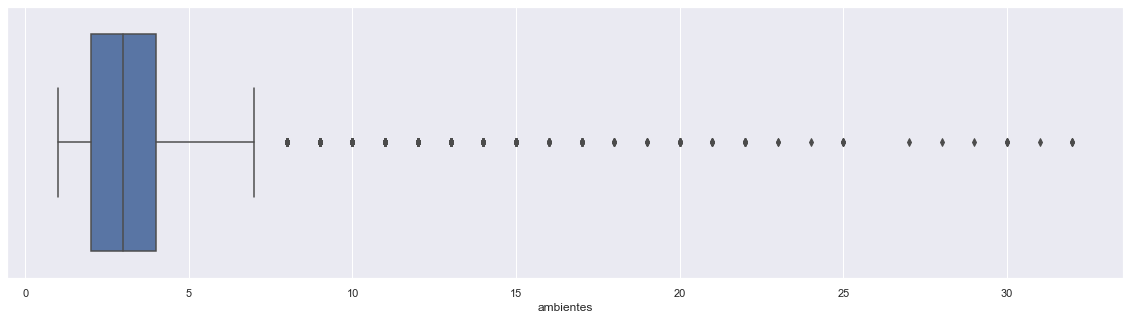

In [29]:
sns.set(style="darkgrid")
f, ax = plt.subplots(figsize=(20, 5))
ax.set_xscale("linear")
sns.boxplot(df['ambientes'])
plt.show()

# Verifico tipo de cambio del momento

In [30]:
df['Moneda'].value_counts()

USD    85874
ARS    12656
PEN        2
UYU        1
Name: Moneda, dtype: int64

# Cuidado que tengo muchos valores nulos en esta campo. Elimino los 3 registros en donde la moneda no es dolar o pesos argentinos

In [31]:
df.drop(df[(df.Moneda == 'UYU') | (df.Moneda == 'PEN')].index,inplace = True)

In [32]:
df['verifPrecioUSD'] = round( df['precio'] /df['precio_USD'],3)

In [33]:
df['verifPrecioUSD'].value_counts()

1.000     85874
17.831    12321
17.143      263
17.634       54
17.798        6
17.204        4
17.503        3
17.404        2
17.427        1
17.467        1
17.405        1
Name: verifPrecioUSD, dtype: int64

# Columna ambientes
### Como primer paso sacaremos la media y el desvio std de la columna Luego diremos que nos muestre cuantos valores de la columna ambientes consideraremos outliers (lo haremos con aquellos que esten 3 desvios alejados de la media)

In [34]:
media = df['ambientes'].mean()
desvio = df['ambientes'].std()
len(df.loc[df['ambientes']>(media +3*desvio),['ambientes']])

709

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115966 entries, 0 to 121219
Data columns (total 21 columns):
tipo_propiedad             115966 non-null object
Barrio                     115966 non-null object
lugar_con_padres           115966 non-null object
country_name               115966 non-null object
Localidad                  115966 non-null object
geonames_id                97793 non-null float64
lat-lon                    67755 non-null object
Latitud                    67755 non-null float64
Longitud                   67755 non-null float64
precio                     98531 non-null float64
Moneda                     98530 non-null object
precio_ARS                 98531 non-null float64
precio_USD                 98531 non-null float64
superficie_total_m2        103977 non-null float64
sup_cubierta_m2            97168 non-null float64
precio_USD_por_m2_total    66802 non-null float64
precio_por_m2_cubierto     85655 non-null float64
ambientes                  46070 non-nul

In [36]:
df['ambientes'].isnull().sum() / 115966  *100

60.27283859062139

## El 60% de los valores de este campo son nulos

## Se crea diccionario para modificar descripciones donde los ambientes esten indicados como string

### Se itera el campo descripcion reemplazando los valores del diccionario

In [37]:
numeros = {'mono': 1, 'uno':1 , 'un': 1, 'dos': 2, 'tres': 3, 'cuatro': 4, 'cinco': 5, 'seis': 6, 'siete': 7, 'ocho': 8, 'nueve': 9, 'diez':10}
for  key, value in numeros.items():
   df.loc[:, 'description'] = df.loc[:, 'description'].str.replace(key, str(value), flags=re.IGNORECASE)

#se repite para campo title
for  key, value in numeros.items():
   df.loc[:, 'title'] = df.loc[:, 'title'].str.replace(key, str(value), flags=re.IGNORECASE)

### Se crea pattern y column Amb donde se aplica la regex

In [38]:
pattern_amb =r'(?:(\d+)(?:\s*AMB))'

regex_amb = re.compile(pattern_amb, flags= re.IGNORECASE)
df['amb_desc'] = df['description'].str.extract(regex_amb, expand=True)
#se aplica misma regex para campo titulo
df['amb_title'] = df['title'].str.extract(regex_amb, expand=True)

### Se crea pattern y columnas para regex cuartos

In [39]:
pattern_cuartos = r'(\s\d+)(?=\s*DORM|\s*CUARTOS|\s*HAB|\s*dorm|\s*cuartos|\s*hab)'
regex_cuartos = re.compile(pattern_cuartos, flags= re.IGNORECASE)
df['cuartos_title'] = df['title'].str.extract(regex_cuartos, expand=True)
df['cuartos_description'] = df['description'].str.extract(regex_cuartos, expand=True)

In [40]:
#Sumamos '1' al valor de cuartos para obtener los ambientes totales
df['cuartosmasuno']=df[['cuartos_title']].apply(lambda x: (int(x['cuartos_title'])+1) if(np.all(pd.notnull(x['cuartos_title']))) else x, axis = 1)

### Se crea pattern y columnas para regex hotel

In [41]:
pattern_hotel = r'(\s*HOTEL|\s*hotel)'
regex_hotel = re.compile(pattern_hotel, flags= re.IGNORECASE)
df['hotel_title'] = df['title'].str.extract(regex_hotel, expand=True)

In [42]:
df.drop(df[(df.hotel_title == 'hotel')| (df.hotel_title == 'Hotel')| (df.hotel_title == 'HOTEL')].index,inplace = True)
df.drop(df[(df.hotel_title == ' hotel')| (df.hotel_title == ' Hotel')| (df.hotel_title == ' HOTEL')| (df.hotel_title == '  Hotel')].index,inplace = True)

In [43]:
#se crea variable donde amb_desc es nulo y amb_title no es nulo
A=df[df.amb_desc.isnull()& df.amb_title.notnull()]

#Se reemplazan nulos por no nulos
df.at[A.index,'amb_desc']=A.amb_title

#Se repite procedimiento y se completa campo "AMBIENTES" del dataset
B=df[df.ambientes.isnull()& df.amb_desc.notnull()]
df.at[B.index,'ambientes']=B.amb_desc
C=df[df.cuartos_title.isnull()& df.cuartos_description.notnull()]
df.at[C.index,'cuartos_title']=C.cuartos_description

In [44]:
F=df[df.ambientes.isnull()& df.cuartosmasuno.notnull()]
#Se reemplazan nulos por no nulos
df.at[F.index,'ambientes']=F.cuartosmasuno

### Logramos completar mas de 30.000 casos en donde el campo ambientes estaba vacio

In [45]:
df.ambientes.notnull().sum()

76955

### Vamos a generar un conjunto de dummies para sacar informacion de las columnas description/title

In [46]:
cualidades = {'al_frente':'al frente','excelente':['excelente', 'categoría', 'categoria', 'impecable', 'nuevo'],'lavadero': 'lavadero',
             'telefono': ['teléfono','telefono'], 'internet': 'internet', 'aire': 'aire',
             'calefaccion': ['calefacción','calefaccion','estufa', 'losa radiante'],
             'luminoso': ['luz', 'luminoso', 'luminosidad'], 'apto': 'apto', 'garage':['garage', 'cochera', 'estacionamiento'],
             'balcon': ['balcón','balcon'], 'terraza': 'terraza'}
amenities = {'parrilla': 'parrilla', 'gimnasio': ['gimnasio','gym'], 'sum': 'sum', 'pileta': ['pileta', 'piscina'],
           'hidromasaje': ['hidromasaje','jacuzzi', 'ducha escocesa'], 'vigilancia' : ['vigilancia', 'seguridad'],
            'playrooom': 'playroom', 'cancha': ['cancha', 'tenis', 'futbol'] }
def create_dummies(dic, tp, col):
   for key, value in dic.items():
       if type(value) == list:
           words = ''
           for x in value:
               words += str(x) + '|'
           words = words[:-1]
           pattern = r'(' + str(words) +')'
       else:
           pattern = r'(' + str(value) +')'
       
       regex = re.compile(pattern, flags= re.IGNORECASE)
       exec('df["'+tp+'_'+key+'"] = df["'+col+'"].str.extract(regex, expand = True)')
       exec('df["'+tp+'_'+key+'"] = df["'+tp+'_'+key+'"].where(df["'+tp+'_'+key+'"].isnull(), 1).fillna(0).astype(int)')
create_dummies(amenities,'a', 'description')

In [47]:
cualidades = {'al_frente':'al frente','excelente':['excelente', 'categoría', 'categoria', 'impecable', 'nuevo'],'lavadero': 'lavadero',
             'telefono': ['teléfono','telefono'], 'internet': 'internet', 'aire': 'aire',
             'calefaccion': ['calefacción','calefaccion','estufa', 'losa radiante'],
             'luminoso': ['luz', 'luminoso', 'luminosidad'], 'apto': 'apto', 'garage':['garage', 'cochera', 'estacionamiento'],
             'balcon': ['balcón','balcon'], 'terraza': 'terraza'}
amenities = {'parrilla': 'parrilla', 'gimnasio': ['gimnasio','gym'], 'sum': 'sum', 'pileta': ['pileta', 'piscina'],
           'hidromasaje': ['hidromasaje','jacuzzi', 'ducha escocesa'], 'vigilancia' : ['vigilancia', 'seguridad'],
            'playrooom': 'playroom', 'cancha': ['cancha', 'tenis', 'futbol'] }
def create_dummies(dic, tp, col):
   for key, value in dic.items():
       if type(value) == list:
           words = ''
           for x in value:
               words += str(x) + '|'
           words = words[:-1]
           pattern = r'(' + str(words) +')'
       else:
           pattern = r'(' + str(value) +')'
       
       regex = re.compile(pattern, flags= re.IGNORECASE)
       exec('df["'+tp+'_'+key+'"] = df["'+col+'"].str.extract(regex, expand = True)')
       exec('df["'+tp+'_'+key+'"] = df["'+tp+'_'+key+'"].where(df["'+tp+'_'+key+'"].isnull(), 1).fillna(0).astype(int)')
create_dummies(cualidades,'c', 'description')

### Visualizamos todas las cualidades/amenities para una mejor idea de la oferta


In [48]:
df2 = df.pivot_table(['c_garage','a_pileta','a_parrilla','c_lavadero'],index='Localidad', aggfunc={'c_garage': sum,'a_pileta':sum,'a_parrilla':sum,'c_lavadero':sum})
df3 = df.pivot_table(['c_garage','a_pileta','a_parrilla','c_lavadero'],index='Localidad', aggfunc={'c_garage': len,'a_pileta':len,'a_parrilla':len,'c_lavadero':len})
df5 = round(df2 / df3,2)*100

In [49]:
df5

,a_parrilla,a_pileta,c_garage,c_lavadero
Localidad,,,,
Bs.As. G.B.A. Zona Norte,53.0,48.0,50.0,47.0
Bs.As. G.B.A. Zona Oeste,27.0,21.0,43.0,37.0
Bs.As. G.B.A. Zona Sur,31.0,24.0,49.0,42.0
Buenos Aires Costa Atlántica,25.0,12.0,40.0,27.0
Buenos Aires Interior,23.0,23.0,38.0,34.0
Capital Federal,28.0,23.0,36.0,27.0
Catamarca,7.0,44.0,48.0,7.0
Chaco,28.0,12.0,44.0,30.0
Chubut,8.0,4.0,13.0,22.0


### Reseteo indices de dataframe temporales para poder trabjar con ellos en los graficos

In [50]:
df2.reset_index(inplace=True)
df3.reset_index(inplace=True)
df5.reset_index(inplace=True)

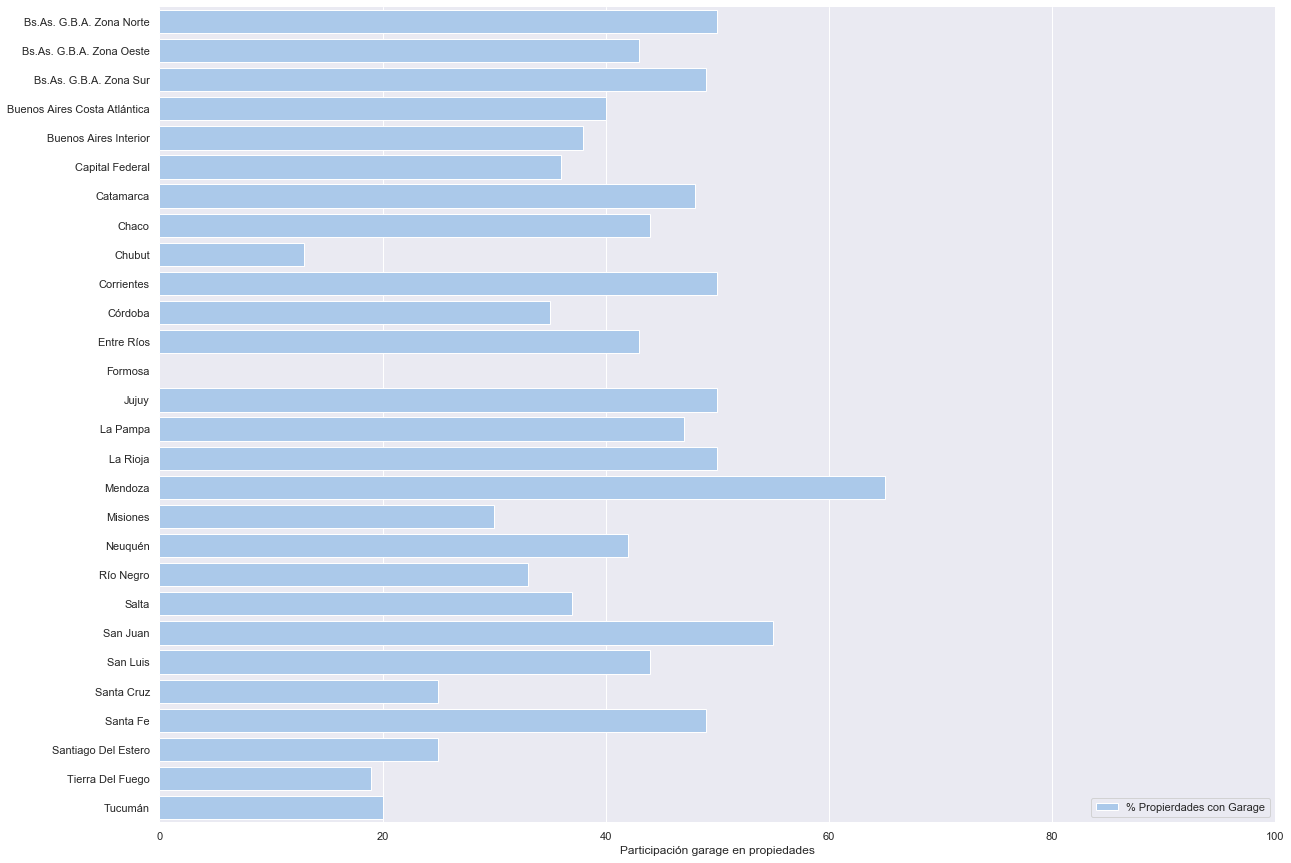

In [51]:
##Graficamos por ejemplo el % de propiedades c/garage por localidad
f, ax = plt.subplots(figsize=(20, 15))
sns.set_color_codes("pastel")
sns.barplot(x="c_garage", y="Localidad", data=df5,
            label="% Propierdades con Garage", color="b")

ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 100), ylabel="",
       xlabel="Participación garage en propiedades")
sns.despine(left=True, bottom=True)

In [52]:
df5.sort_values('a_parrilla',ascending=False)

,Localidad,a_parrilla,a_pileta,c_garage,c_lavadero
0,Bs.As. G.B.A. Zona Norte,53.0,48.0,50.0,47.0
25,Santiago Del Estero,50.0,25.0,25.0,25.0
9,Corrientes,35.0,39.0,50.0,35.0
2,Bs.As. G.B.A. Zona Sur,31.0,24.0,49.0,42.0
5,Capital Federal,28.0,23.0,36.0,27.0
7,Chaco,28.0,12.0,44.0,30.0
1,Bs.As. G.B.A. Zona Oeste,27.0,21.0,43.0,37.0
3,Buenos Aires Costa Atlántica,25.0,12.0,40.0,27.0
17,Misiones,25.0,12.0,30.0,31.0
4,Buenos Aires Interior,23.0,23.0,38.0,34.0


In [53]:
df.columns

Index(['tipo_propiedad', 'Barrio', 'lugar_con_padres', 'country_name',
       'Localidad', 'geonames_id', 'lat-lon', 'Latitud', 'Longitud', 'precio',
       'Moneda', 'precio_ARS', 'precio_USD', 'superficie_total_m2',
       'sup_cubierta_m2', 'precio_USD_por_m2_total', 'precio_por_m2_cubierto',
       'ambientes', 'description', 'title', 'verifPrecioUSD', 'amb_desc',
       'amb_title', 'cuartos_title', 'cuartos_description', 'cuartosmasuno',
       'hotel_title', 'a_parrilla', 'a_gimnasio', 'a_sum', 'a_pileta',
       'a_hidromasaje', 'a_vigilancia', 'a_playrooom', 'a_cancha',
       'c_al_frente', 'c_excelente', 'c_lavadero', 'c_telefono', 'c_internet',
       'c_aire', 'c_calefaccion', 'c_luminoso', 'c_apto', 'c_garage',
       'c_balcon', 'c_terraza'],
      dtype='object')

### Calculamos precio promedio M2 por tipo de propiedad, localidad y barrio

### Vemos los valores atipicos de valor de M2 para los barrios de Boedo y San Cristobal

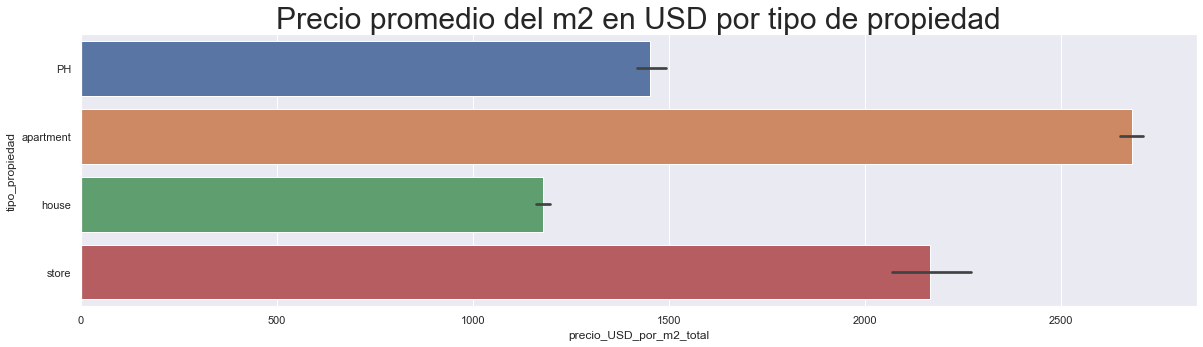

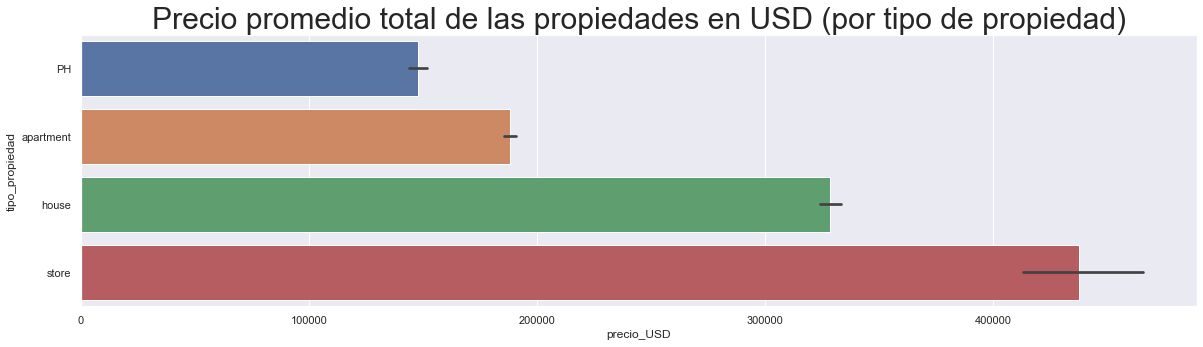

In [61]:
fig, ax = plt.subplots(figsize=(20,5))  
sns.barplot(x='precio_USD_por_m2_total', y='tipo_propiedad', data=df)
plt.title('Precio promedio del m2 en USD por tipo de propiedad', fontsize=30)
plt.show()

fig, ax = plt.subplots(figsize=(20,5))  
sns.barplot(x='precio_USD', y='tipo_propiedad', data=df)
plt.title('Precio promedio total de las propiedades en USD (por tipo de propiedad)', fontsize=30)
plt.show()

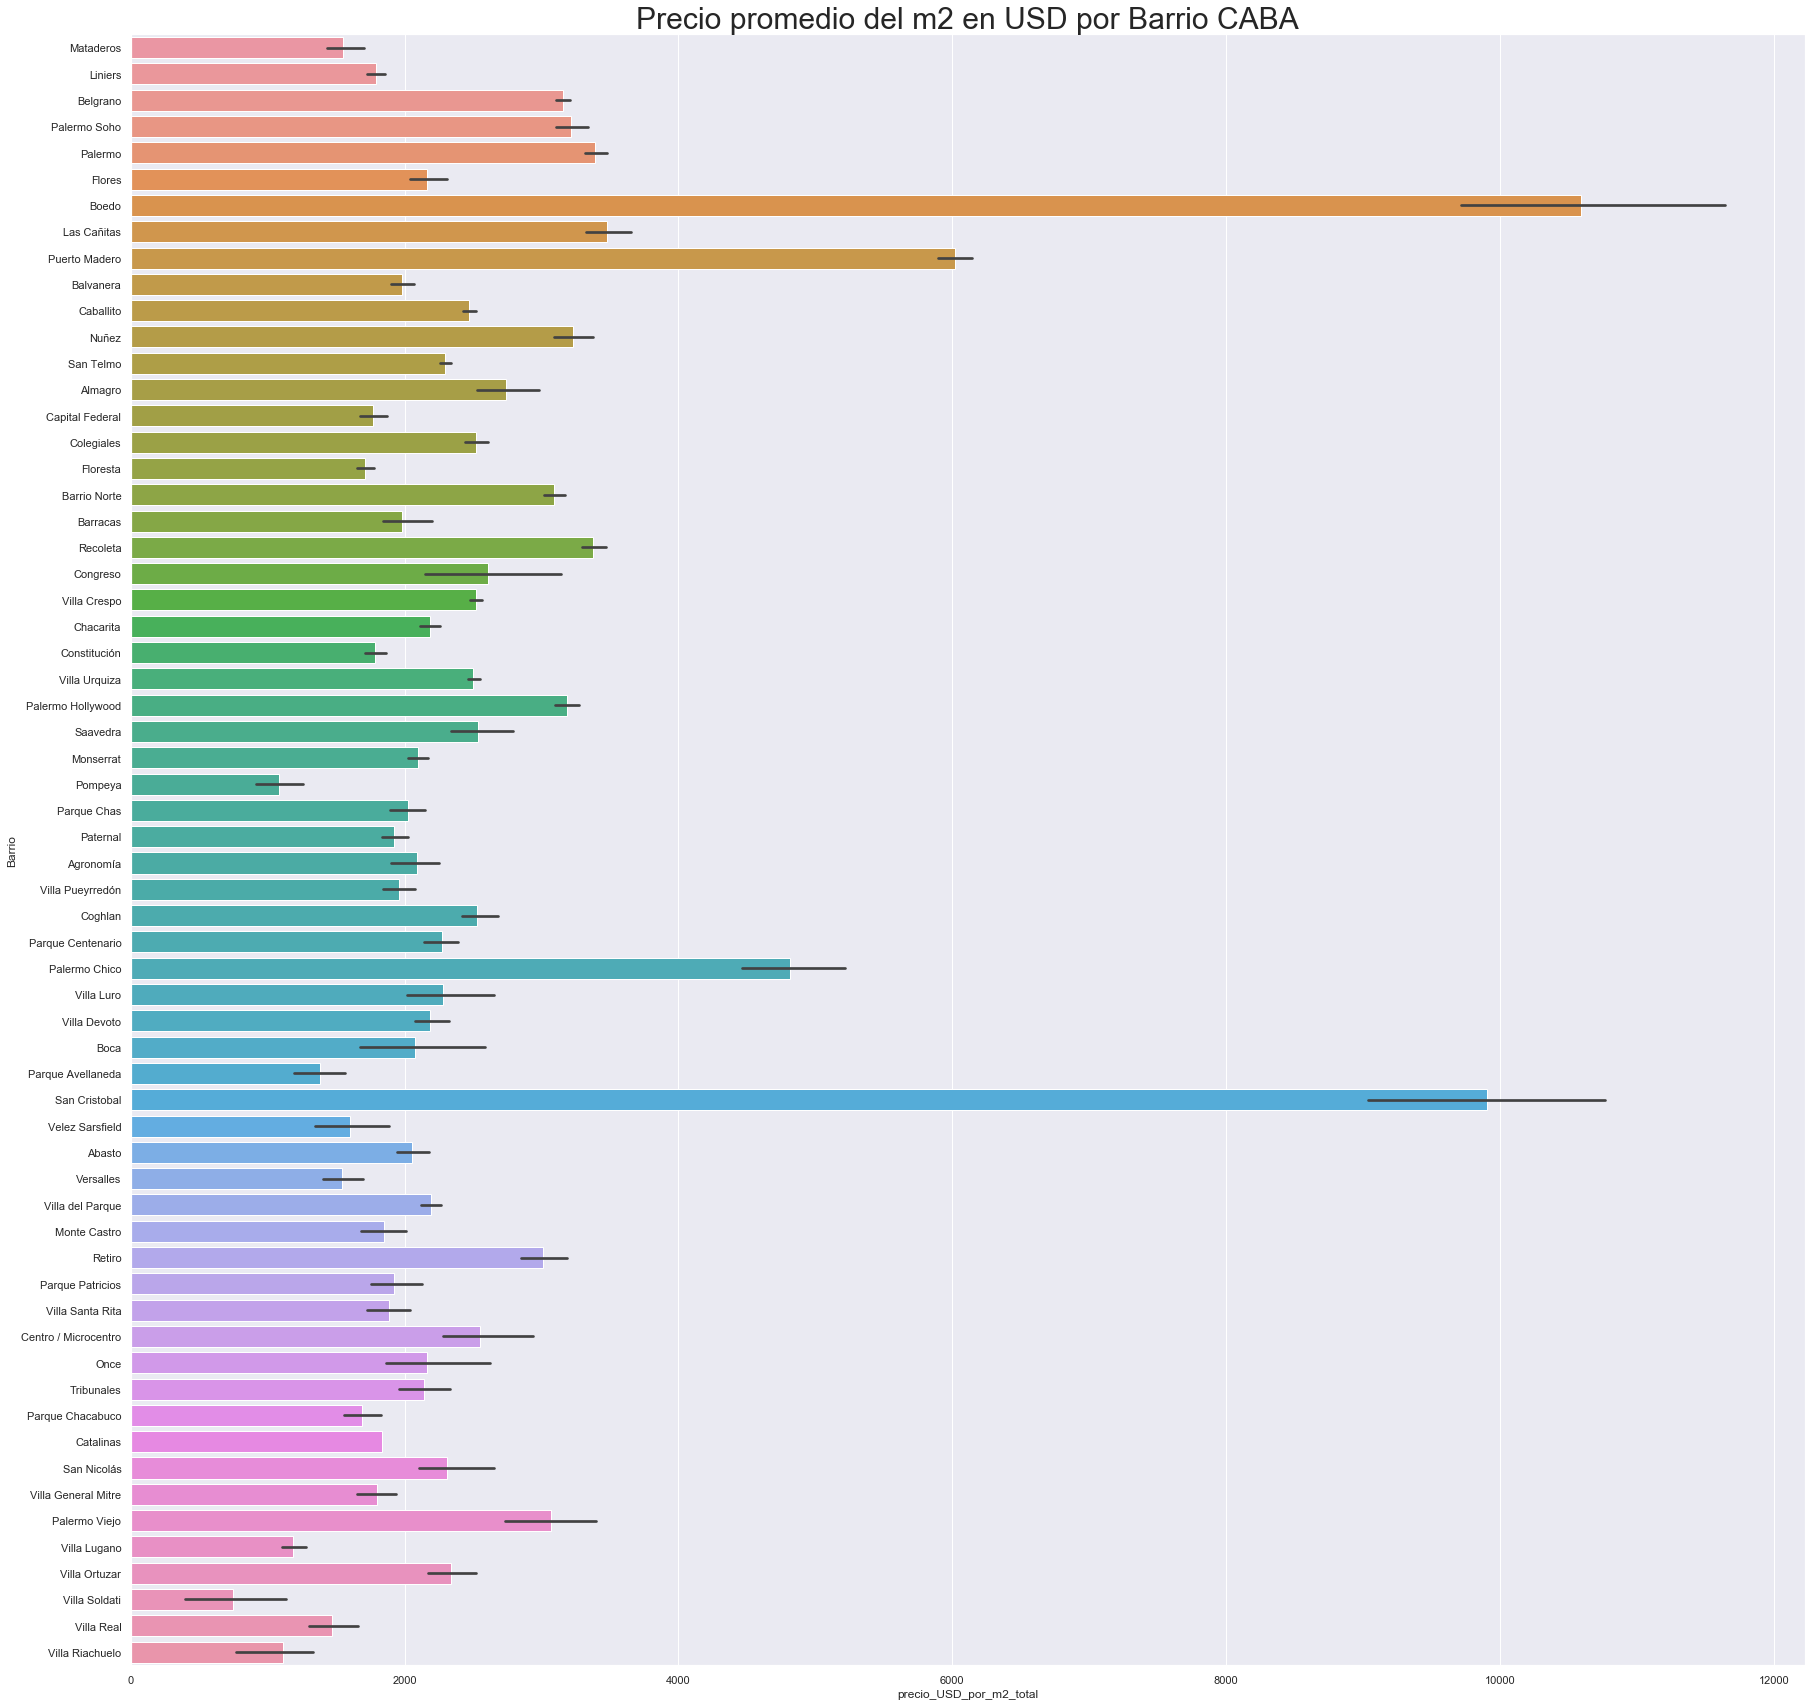

In [73]:
fig, ax = plt.subplots(figsize=(30,30))  
sns.barplot(x='precio_USD_por_m2_total', y='Barrio', data=Barrios_CABA)
plt.title('Precio promedio del m2 en USD por Barrio CABA', fontsize=30)
plt.show()

In [65]:
Barrios_CABA = df.loc[df['Localidad'] == 'Capital Federal']

In [66]:
Barrios_CABA

,tipo_propiedad,Barrio,lugar_con_padres,country_name,Localidad,geonames_id,lat-lon,Latitud,Longitud,precio,...,c_lavadero,c_telefono,c_internet,c_aire,c_calefaccion,c_luminoso,c_apto,c_garage,c_balcon,c_terraza
0,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6618237,-58.5088387",-34.661824,-58.508839,62000.0,...,1,0,0,0,0,0,1,0,0,0
2,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6522615,-58.5229825",-34.652262,-58.522982,72000.0,...,1,0,0,0,0,0,0,0,0,0
3,PH,Liniers,|Argentina|Capital Federal|Liniers|,Argentina,Capital Federal,3431333.0,"-34.6477969,-58.5164244",-34.647797,-58.516424,95000.0,...,0,0,0,0,0,0,0,0,0,0
7,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.5598729,-58.443362",-34.559873,-58.443362,138000.0,...,0,0,0,0,0,1,1,0,0,0
8,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.5598729,-58.443362",-34.559873,-58.443362,195000.0,...,0,0,0,0,0,1,1,0,0,0
13,apartment,Palermo Soho,|Argentina|Capital Federal|Palermo|Palermo Soho|,Argentina,Capital Federal,3430234.0,NaN,NaN,NaN,111700.0,...,0,0,0,0,0,0,0,0,1,1
14,apartment,Palermo Soho,|Argentina|Capital Federal|Palermo|Palermo Soho|,Argentina,Capital Federal,3430234.0,NaN,NaN,NaN,147900.0,...,0,0,0,0,0,0,0,0,1,0
16,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6523561177,-58.5016239381",-34.652356,-58.501624,239000.0,...,0,0,0,0,0,1,0,0,0,0
19,apartment,Palermo,|Argentina|Capital Federal|Palermo|,Argentina,Capital Federal,3430234.0,"-34.580503566,-58.4058744847",-34.580504,-58.405874,350000.0,...,0,0,0,1,0,1,0,0,1,1
21,apartment,Palermo,|Argentina|Capital Federal|Palermo|,Argentina,Capital Federal,3430234.0,"-34.590926,-58.4116653",-34.590926,-58.411665,270500.0,...,0,0,0,0,0,0,0,0,0,0


## Columnas de Precio
### Recalculamos el precios M2 en USD donde el precio sea mayor a USD 10k

In [75]:
conditions = [(df['precio_USD_por_m2_total']>10000) & (df['precio_USD_por_m2_total'] > df['precio_por_m2_cubierto'])]
choices = [df['precio_USD'] /df['sup_cubierta_m2'] ]
df['precio_USD_por_m2_total'] = np.select(conditions, choices, df['precio_USD_por_m2_total'])

### Corrigo Villa Ballester

In [81]:
conditions = [(df['Barrio'] =='Villa Ballester') & (df['precio_USD_por_m2_total'] > 10000)]   
choices = [(df['precio_USD']/17.831) ]
df['precio_USD'] = np.select(conditions, choices, df['precio_USD'])

choices = [(df['precio_USD']/df['sup_cubierta_m2']) ]
df['precio_por_m2_cubierto'] = np.select(conditions, choices, df['precio_por_m2_cubierto'])

choices = [(df['precio_USD']/df['superficie_total_m2']) ]
df['precio_USD_por_m2_total'] = np.select(conditions, choices, df['precio_USD_por_m2_total'])

In [82]:
conditions = [(df['Barrio'] =='Villa Ballester') & (df['precio_USD_por_m2_total'] > 10000) &(df['Moneda'] =='USD')]   
choices = [(df['precio_USD']) ]
df['precio'] = np.select(conditions, choices, df['precio'])

### Corrigo Aldo Bonzi

In [83]:
conditions = [(df['Barrio'] =='Aldo Bonzi') & (df['precio_USD_por_m2_total'] > 10000)]   
choices = [750]
df['precio_por_m2_cubierto'] = np.select(conditions, choices, df['precio_por_m2_cubierto'])

choices =[( df['precio_USD']/df['precio_por_m2_cubierto'])]
df['sup_cubierta_m2'] = np.select(conditions, choices, df['sup_cubierta_m2'])
df['superficie_total_m2'] = np.select(conditions, choices, df['superficie_total_m2'])

choices = [750]
df['precio_USD_por_m2_total'] = np.select(conditions, choices, df['precio_USD_por_m2_total'])

### Completo precio por metro nulos por precio metros cubiertos

In [84]:
df.precio_USD_por_m2_total=df.precio_USD_por_m2_total.fillna(value=df.precio_por_m2_cubierto)

# Manejo de outlier

### Calculo los precios promedio por M2 por Barrio

In [89]:
Prec=df[ (df['precio_USD_por_m2_total'] < 10000)]
PrProm=pd.DataFrame(Prec.groupby(['Barrio', 'tipo_propiedad'])['precio_USD_por_m2_total'].mean())
PrProm.rename(columns={'precio_USD_por_m2_total': 'PromPrecio'},inplace=True)
df=pd.merge(left=df,right=PrProm, how='left',left_on=['Barrio','tipo_propiedad'], right_on = ['Barrio','tipo_propiedad'])

### Ajusto precios y relacionados dependiendo del promedio por barrio y tipo propiedad

In [91]:
conditions = [(df['precio_USD_por_m2_total'] > 9999)]
choices = [(df['PromPrecio']*df['superficie_total_m2']) ]
df['precio_USD'] = np.select(conditions, choices, df['precio_USD'])
choices = [(df['PromPrecio']) ]
df['precio_USD_por_m2_total'] = np.select(conditions, choices, df['precio_USD_por_m2_total'])
choices = [(df['precio_USD']/df['sup_cubierta_m2']) ]
df['precio_por_m2_cubierto'] = np.select(conditions, choices, df['precio_por_m2_cubierto'])

### Ajusto Boedo y San Cristobal

In [92]:
conditions = [(df['Barrio'] =='Boedo') & (df['precio_USD_por_m2_total'] > df['PromPrecio']), (df['Barrio'] =='San Cristobal') & (df['precio_USD_por_m2_total'] > df['PromPrecio'])]
choices = [(df['PromPrecio']*df['superficie_total_m2']) ,(df['PromPrecio']*df['superficie_total_m2'])]
df['precio_USD'] = np.select(conditions, choices, df['precio_USD'])
choices = [(df['PromPrecio']), (df['PromPrecio'])]
df['precio_USD_por_m2_total'] = np.select(conditions, choices, df['precio_USD_por_m2_total'])
choices = [(df['precio_USD']/df['sup_cubierta_m2']), (df['precio_USD']/df['sup_cubierta_m2'])]
df['precio_por_m2_cubierto'] = np.select(conditions, choices, df['precio_por_m2_cubierto'])

### Ajusto Hudson

In [ ]:
conditions = [(df['Barrio'] =='Guillermo Hudson')]   
choices = [2000]
df['precio_por_m2_cubierto'] = np.select(conditions, choices, df['precio_por_m2_cubierto'])

choices =[( df['precio_USD']/df['precio_por_m2_cubierto'])]
df['sup_cubierta_m2'] = np.select(conditions, choices, df['sup_cubierta_m2'])
df['superficie_total_m2'] = np.select(conditions, choices, df['superficie_total_m2'])

choices = [2000]
df['precio_USD_por_m2_total'] = np.select(conditions, choices, df['precio_USD_por_m2_total'])

### Si no tenemos precio en ARS, lo podemos llenar con la * de PRECIOxM2 (ARS) y superficie_total_m2

In [109]:
p_m2 = df.loc[(df['precio_USD'].isnull())&(~df['precio_USD_por_m2_total'].isnull())&(~df['superficie_total_m2'].isnull()) , ['precio_USD_por_m2_total']]
sup = df.loc[(df['precio_USD'].isnull())&(~df['precio_USD_por_m2_total'].isnull())&(~df['superficie_total_m2'].isnull()) , ['superficie_total_m2']]
df.loc[df['precio_USD'].isnull(), 'precio_USD'] = p_m2*sup

### Si no tenemos el PRECIOxM2 en USD, lo podemos llenar con la * precio_USD_por_m2_total y superficie_total_m2

In [111]:
precio = df.loc[(df['precio_USD'].isnull())&(df['precio_USD_por_m2_total'].isnull())&(df['superficie_total_m2'].isnull()) , ['precio_USD']]
superficie = df.loc[(df['precio_USD'].isnull())&(df['precio_USD_por_m2_total'].isnull())&(df['superficie_total_m2'].isnull()) , ['precio_USD']]
df.loc[df['precio_USD_por_m2_total'].isnull(), 'precio_USD_por_m2_total'] = precio/superficie

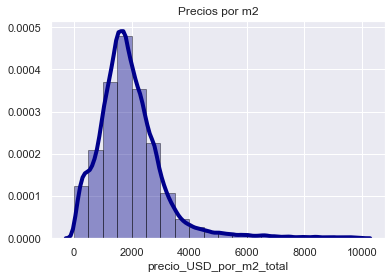

In [114]:
#HISTOGRAMA PRECIOS POR M2
Prenonull=df.dropna(subset=['precio_USD_por_m2_total'])
plt.title ('Precios por m2')
sns.distplot(Prenonull['precio_USD_por_m2_total'], hist=True, kde=True, 
             bins=int(100/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
plt.show()